In [53]:
#import libraries
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

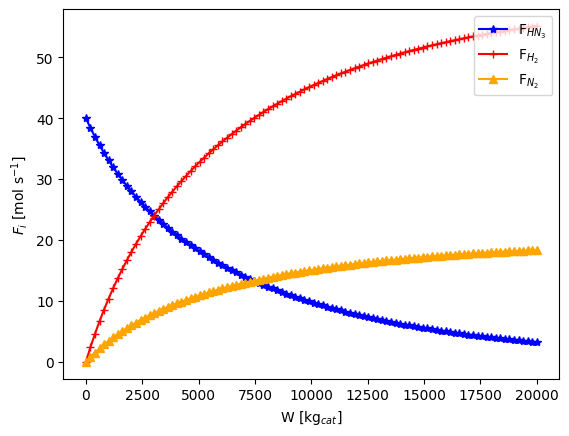

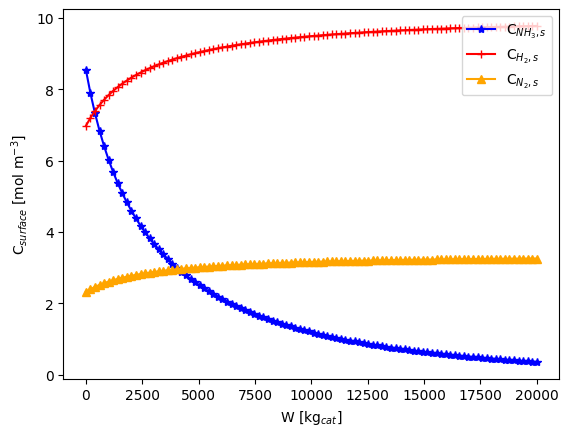

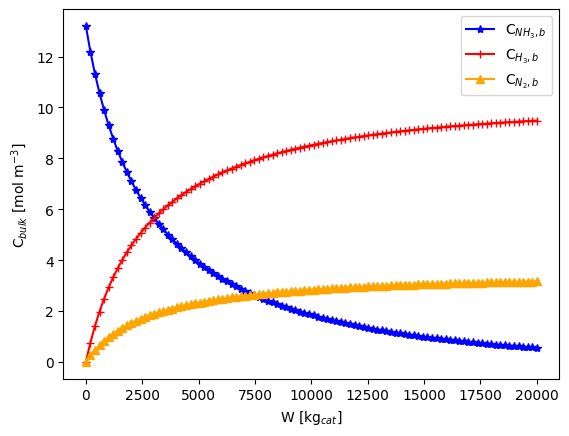

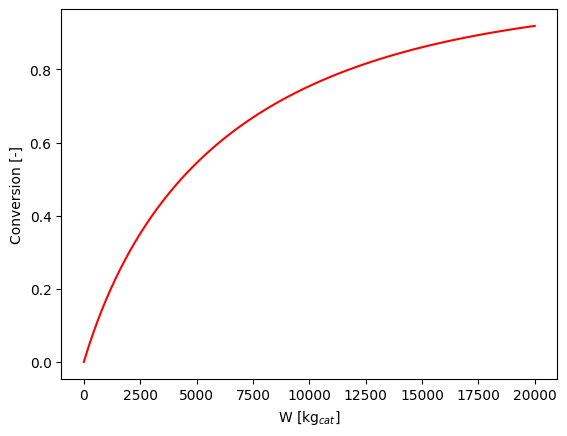

In [54]:
# function
def funstep1 (z,y):
    FA = y[0]
    FB = y[1]
    FC = y[2]
    FT_v = FA + FB + FC
    CAb  = (FA/FT_v) *P/(R*Tin)
    CAs  = (kf/(kf+((rhocat*K1*dp)/6)))*CAb
    #missing rA
    rA = K1*CAs
    dy1    = nuA1*rA*W
    dy2    = nuB1*rA*W
    dy3    = nuC1*rA*W
    return np.array([dy1,dy2,dy3])

# constant parameters
R      = 8.31441    # Universal gas constant, J/(mol K)
W      = 20000        # Catalyst weight, kg
rhocat = 915        # Density of the catalyst particle, kgcat/m3
dp     = 910e-6       # Particle diameter, m
K1     = 9.6e-4     # rate constant of reaction, m3/(kgcat s)
kf     = 2.45e-4       # mass transfer coefficient, m/s
P      = 1.01e5     # Total pressure, Pa
Tin    = 920        # Temperatur, K


# Stoichiometric coefficients of the reaction
#Using 2NH3 -> 3H2 + N2 (per 1 mol of NH3 consumed)
nuA1 = -1.0 #NH3 consumed
nuB1 = 1.5 #H2 produced
nuC1 = 0.5 #N2 produced

zspan = np.linspace(0,1,100)

FAin  = 40
FBin  = 0
FCin  = 0

# inital values
y0 = [FAin, FBin, FCin]



# solve
y = np.zeros((len(zspan), len(y0))) #array for solution
y [0,:] = y0
r = integrate.ode(funstep1).set_integrator("dopri5") # choice of method
r.set_initial_value(y0,0) #inital values
for i in range(1, zspan.size):
    y[i,:]=r.integrate(zspan[i])
    if not r.successful():
        raise RuntimeError("Could not integrate")

#Calculate values
FA     = y[:,0]
FB     = y[:,1]
FC     = y[:,2]

FT_v   = FA + FB + FC
CAb    = (FA/FT_v) *P/(R*Tin)
CBb    = (FB/FT_v) *P/(R*Tin)
CCb    = (FC/FT_v) *P/(R*Tin)

CAs    = (kf/(kf+((rhocat*K1*dp)/6)))*CAb
CBs    = CBb + ((rhocat*dp)/(6*kf))*(nuB1*K1*CAs)
CCs    = CCb + ((rhocat*dp)/(6*kf))*(nuC1*K1*CAs)

#conversion
conv=(FAin-FA)/FAin
# Plot
# Figure 1
plt.figure(1)
plt.plot(zspan*W, y[:,0],'*-', color='blue')
plt.plot(zspan*W, y[:,1], '-+', color='red')
plt.plot(zspan*W, y[:,2],'-^', color='orange')
plt.ylabel('$F_i$ [mol s$^{-1}$]')
plt.xlabel('W [kg$_{cat}$]')
plt.legend(['F$_{HN_3}$','F$_{H_2}$','F$_{N_2}$'],loc='upper right')
plt.show()
# Figure 2
plt.figure(2)
plt.plot(zspan*W, CAs,'*-', color='blue')
plt.plot(zspan*W, CBs, '-+', color='red')
plt.plot(zspan*W, CCs,'-^', color='orange')
plt.ylabel('C$_{surface}$ [mol m$^{-3}$]')
plt.xlabel('W [kg$_{cat}$]')
plt.legend(['C$_{NH_{3},s}$','C$_{H_{2},s}$','C$_{N_{2},s}$'],loc='upper right')
plt.show()
#Figure 3
plt.figure(3)
plt.plot(zspan*W, CAb,'*-', color='blue')
plt.plot(zspan*W, CBb, '-+', color='red')
plt.plot(zspan*W, CCb,'-^', color='orange')
plt.ylabel('C$_{bulk}$ [mol m$^{-3}$]')
plt.xlabel('W [kg$_{cat}$]')
plt.legend(['C$_{NH_{3},b}$','C$_{H_{3},b}$','C$_{N_{2},b}$'],loc='upper right')
plt.show()
#Figure 4
plt.figure(4)
plt.plot(zspan*W, conv,'-', color='red')
plt.ylabel('Conversion [-]')
plt.xlabel('W [kg$_{cat}$]')
plt.show()

# Sensitivity Analysis

Using the following multipliers:

kf: 0.5x, 1x, 2x, 5x 

K1: 0.5x, 1x, 2x, 5x 


In [55]:
def solve_once():
    # solve
    y = np.zeros((len(zspan), len(y0)))
    y[0, :] = y0
    r = integrate.ode(funstep1).set_integrator("dopri5")
    r.set_initial_value(y0, 0)

    for i in range(1, zspan.size):
        y[i, :] = r.integrate(zspan[i])
        if not r.successful():
            raise RuntimeError("Could not integrate")

    FA = y[:, 0]
    conv = (FAin - FA) / FAin
    Wgrid = zspan * W
    return Wgrid, conv


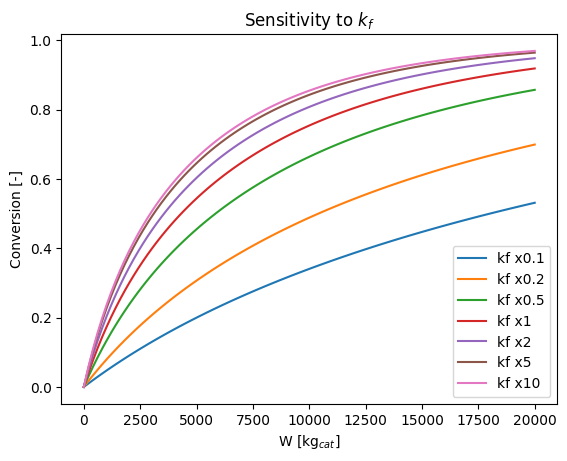

In [56]:
kf_base = kf
K1_base = K1
multipliers = [0.1,0.2,0.5, 1.0, 2.0, 5.0,10.0]

plt.figure()
for m in multipliers:
    kf = kf_base * m   # change kf
    K1 = K1_base       # keep K1 fixed
    Wgrid, conv = solve_once()
    plt.plot(Wgrid, conv, label=f'kf x{m:g}')

plt.xlabel('W [kg$_{cat}$]')
plt.ylabel('Conversion [-]')
plt.legend()
plt.title('Sensitivity to $k_f$')
plt.show()


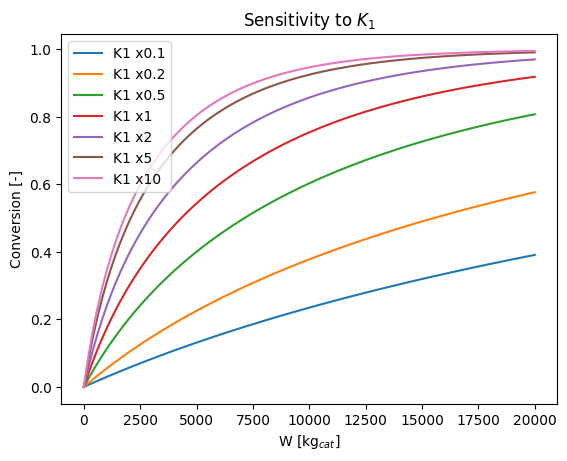

In [57]:
plt.figure()
for m in multipliers:
    kf = kf_base       # keep kf fixed
    K1 = K1_base * m   # change K1
    Wgrid, conv = solve_once()
    plt.plot(Wgrid, conv, label=f'K1 x{m:g}')

plt.xlabel('W [kg$_{cat}$]')
plt.ylabel('Conversion [-]')
plt.legend()
plt.title('Sensitivity to $K_1$')
plt.show()


# Catalysis weight
Calculate the reactor amount of catalyst required to reach 90% conversion of NH3. 

Provide plots of the concentration profiles of all species with respect to catalyst weight. 

Additionally, provide the total required reactor volume.

The catalysis weight for 90% conversion is  7676.767676767678 kg


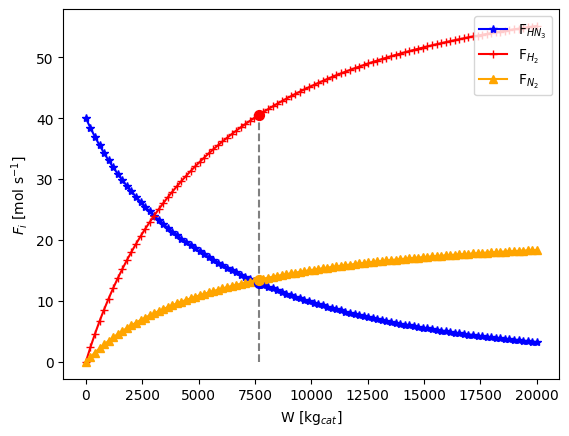

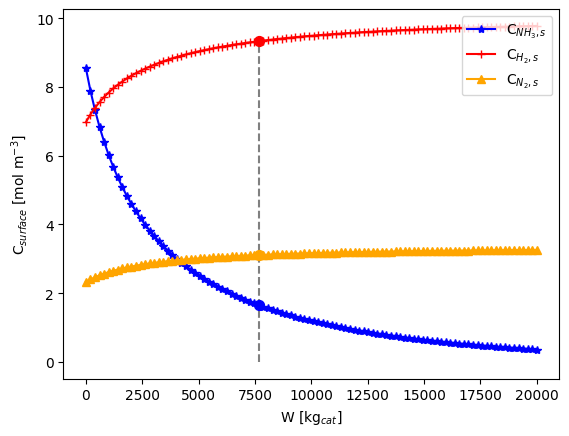

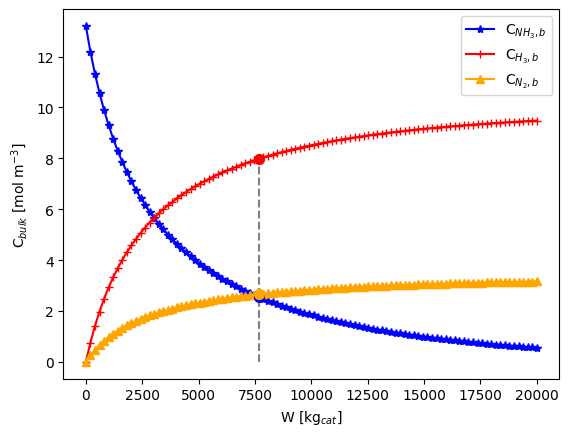

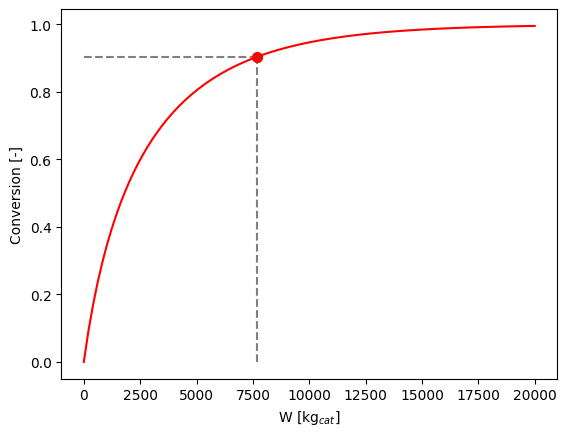

The required cat volume is  8.389910029254292 m^3
The total required reactor volume is  13.753950867629987 m^3


In [58]:
for i in range(len(conv)):
    if conv[i] >= 0.9:
        Wi=zspan[i]*W
        print("The catalysis weight for 90% conversion is ", Wi,"kg")
        idx=i
        break

plt.figure(1)
plt.plot(zspan*W, y[:,0],'*-', color='blue')
plt.plot(zspan*W, y[:,1], '-+', color='red')
plt.plot(zspan*W, y[:,2],'-^', color='orange')
plt.scatter(Wi,y[:,0][idx], color='blue', s=50, zorder=5)
plt.scatter(Wi,y[:,1][idx], color='red', s=50, zorder=5)
plt.scatter(Wi,y[:,2][idx], color='orange', s=50, zorder=5)
plt.vlines(Wi, 0, y[:,1][idx], colors='gray', linestyles='--')
plt.ylabel('$F_i$ [mol s$^{-1}$]')
plt.xlabel('W [kg$_{cat}$]')
plt.legend(['F$_{HN_3}$','F$_{H_2}$','F$_{N_2}$'],loc='upper right')
plt.show()
# Figure 2
plt.figure(2)
plt.plot(zspan*W, CAs,'*-', color='blue')
plt.plot(zspan*W, CBs, '-+', color='red')
plt.plot(zspan*W, CCs,'-^', color='orange')
plt.scatter(Wi,CAs[idx], color='blue', s=50, zorder=5)
plt.scatter(Wi,CBs[idx], color='red', s=50, zorder=5)
plt.scatter(Wi,CCs[idx], color='orange', s=50, zorder=5)
plt.vlines(Wi, 0, CBs[idx], colors='gray', linestyles='--')
plt.ylabel('C$_{surface}$ [mol m$^{-3}$]')
plt.xlabel('W [kg$_{cat}$]')
plt.legend(['C$_{NH_{3},s}$','C$_{H_{2},s}$','C$_{N_{2},s}$'],loc='upper right')
plt.show()
#Figure 3
plt.figure(3)
plt.plot(zspan*W, CAb,'*-', color='blue')
plt.plot(zspan*W, CBb, '-+', color='red')
plt.plot(zspan*W, CCb,'-^', color='orange')
plt.scatter(Wi,CAb[idx], color='blue', s=50, zorder=5)
plt.scatter(Wi,CBb[idx], color='red', s=50, zorder=5)
plt.scatter(Wi,CCb[idx], color='orange', s=50, zorder=5)
plt.vlines(Wi, 0, CBb[idx], colors='gray', linestyles='--')
plt.ylabel('C$_{bulk}$ [mol m$^{-3}$]')
plt.xlabel('W [kg$_{cat}$]')
plt.legend(['C$_{NH_{3},b}$','C$_{H_{3},b}$','C$_{N_{2},b}$'],loc='upper right')
plt.show()
#Figure 4
plt.figure(4)
plt.plot(zspan*W, conv,'-', color='red')
plt.scatter(Wi,conv[idx], color='red', s=50, zorder=5)
plt.vlines(Wi, 0, conv[idx], colors='gray', linestyles='--')
plt.hlines(conv[idx], 0, Wi, colors='gray', linestyles='--')
plt.ylabel('Conversion [-]')
plt.xlabel('W [kg$_{cat}$]')
plt.show()

Vcat=Wi/rhocat
Vti=Vcat/0.61
print("The required cat volume is ",Vcat,"m^3")
print("The total required reactor volume is ",Vti,"m^3")